In [1]:
import numpy as np                     # Numerical algorithms on arrays
import cv2                             # OpenCV
from matplotlib import pyplot as plt   # Plot library
import matplotlib.cm as cm             # Image color map 
import tools                           # A few helpers to plot multiple images
from PIL import Image                  # For rescaling images
from ipywidgets import interact, fixed # Interact with images

In [6]:
img_link = 'images/sudoku/sudoku_00201.png'

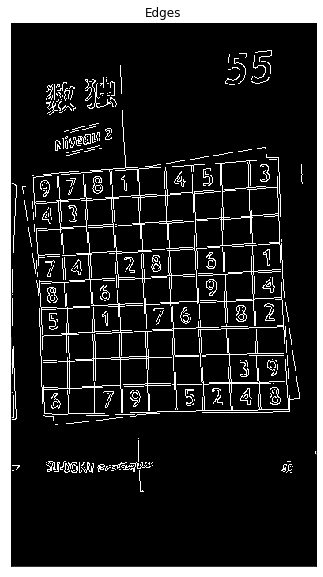

In [12]:
# prefiltrering and scaling 

img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)

iGausKernelSize = 5
imgFilt = cv2.GaussianBlur( img, ( iGausKernelSize, iGausKernelSize), 0)

iReducFactor = 2
iStart = iReducFactor // 2
imgReduc = imgFilt[iStart::iReducFactor, iStart::iReducFactor]
   
# compute the median of the single channel pixel intensities
med = np.median( imgReduc)
 
# apply automatic Canny edge detection using the computed median
sigma = 0.3
loThreshold = int( max( 0, (1.0 - sigma) * med))
hiThreshold = int( min( 255, (1.0 + sigma) * med))

edges = cv2.Canny( imgReduc, loThreshold, hiThreshold, apertureSize=3, L2gradient=False)

# plot all the images
tools.multiPlot( 1, 1, ( edges,),
                       ( 'Edges',),
                        cmap_tuple=( cm.gray,))

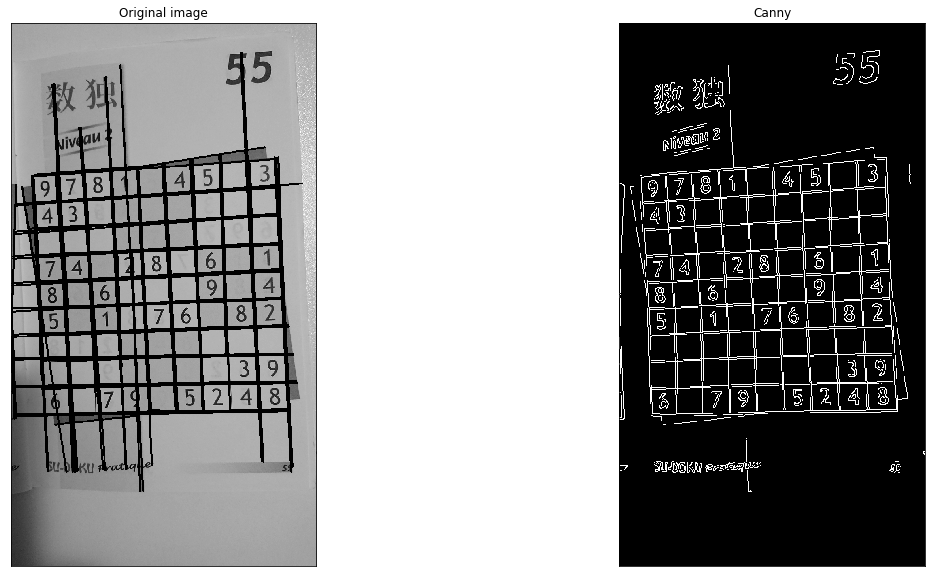

In [21]:
#Hough 

minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),minLineLength,maxLineGap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(img,(2*x1,2*y1),(2*x2,2*y2),(0,255,0),3)



tools.multiPlot( 1, 2, ( img, edges),
                     ( 'Original image', 'Canny'),
                     cmap_tuple=( cm.gray, cm.gray))